## 电话响应模型

## 建模目的: 预测电话销售终端及套餐成功的概率
## 字段信息: 
        '用户号码', 'BI归属', '机龄', '基本账户余额', '年龄', '品牌', '上月2G流量_MB', '上月3G流量_MB',
       '上月4G流量_MB', '上月ARPU', '上月被叫通话次数', '上月本地拨打长途次数', '上月本地市话被叫次数',
       '上月本地市话费用', '上月本地市话主叫次数', '上月本地市话总通话次数', '上月本地长途被叫次数', '上月本地长途费用',
       '上月本地长途总通话次数', '上月短信发送数', '上月短信费用', '上月国内漫游被叫次数', '上月国内漫游通话总次数',
       '上月国内漫游主叫次数', '上月话费', '上月活跃天数', '上月计费通话总时长_分钟', '上月流量', '上月流量总费用',
       '上月省内漫游被叫次数', '上月省内漫游主叫次数', '上月省内漫游总通话次数', '上月套餐外流量费用', '上月通话总时长_分钟',
       '上月语音话费', '上月终端是否双卡', '上月主叫通话次数', '上月总流量_MB', '上月总通话次数', '是否4G卡',
       '是否4G手机', '是否4G套餐', '是否家庭网用户', '是否实名登记', '是否实名确认', '是否双高客户', '是否政企ABC',
       '网龄（月）', '性别', '月租'
       
## 目标字段:  '处理结果'  0表示电话未拨通或者未销售失败, 1表示销售成功

In [235]:
#导入相关模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [236]:
data = pd.read_excel('data.xlsx',sheetname='外呼成功率')

In [237]:
data.head()

,用户号码,BI归属,机龄,基本账户余额,年龄,品牌,上月2G流量_MB,上月3G流量_MB,上月4G流量_MB,上月ARPU,...,是否4G套餐,是否家庭网用户,是否实名登记,是否实名确认,是否双高客户,是否政企ABC,网龄（月）,性别,月租,处理结果
0,13760034670,鼎湖,2,87.69,31.0,全球通,6.87,0.00,0.00,94.59,...,是,否,是,是,否,否,41,男,88.0,0
1,13929819909,德庆,2,NaN,59.0,全球通,0.00,0.00,0.00,96.30,...,是,否,是,是,否,是,126,女,81.0,0
2,13822660891,德庆,1,47.00,NaN,全球通,13.79,596.97,0.00,193.50,...,是,否,是,是,是,是,121,NaN,135.0,0
3,13727285116,鼎湖,1,0.42,39.0,神州行,3.09,13.08,2661.19,118.00,...,是,是,是,否,是,否,42,女,38.0,0
4,13413894871,鼎湖,1,43.18,54.0,神州行,128.41,0.00,0.00,146.10,...,是,否,是,否,是,否,100,男,88.0,0


In [5]:
data.columns

Index(['用户号码', 'BI归属', '机龄', '基本账户余额', '年龄', '品牌', '上月2G流量_MB', '上月3G流量_MB',
       '上月4G流量_MB', '上月ARPU', '上月被叫通话次数', '上月本地拨打长途次数', '上月本地市话被叫次数',
       '上月本地市话费用', '上月本地市话主叫次数', '上月本地市话总通话次数', '上月本地长途被叫次数', '上月本地长途费用',
       '上月本地长途总通话次数', '上月短信发送数', '上月短信费用', '上月国内漫游被叫次数', '上月国内漫游通话总次数',
       '上月国内漫游主叫次数', '上月话费', '上月活跃天数', '上月计费通话总时长_分钟', '上月流量', '上月流量总费用',
       '上月省内漫游被叫次数', '上月省内漫游主叫次数', '上月省内漫游总通话次数', '上月套餐外流量费用', '上月通话总时长_分钟',
       '上月语音话费', '上月终端是否双卡', '上月主叫通话次数', '上月总流量_MB', '上月总通话次数', '是否4G卡',
       '是否4G手机', '是否4G套餐', '是否家庭网用户', '是否实名登记', '是否实名确认', '是否双高客户', '是否政企ABC',
       '网龄（月）', '性别', '月租', '处理结果'],
      dtype='object')

In [6]:
#删除重复列
data.drop(['上月ARPU',"上月本地拨打长途次数",],axis=1,inplace=True)

In [7]:
data["上月本地长途被叫次数"].value_counts()

0    42881
Name: 上月本地长途被叫次数, dtype: int64

In [8]:
#"上月本地长途被叫次数"100%缺失, 删除该字段
data= data.drop("上月本地长途被叫次数",axis=1) 

In [9]:
print(data["是否4G卡"].value_counts())

是    42727
Name: 是否4G卡, dtype: int64


In [10]:
#删除单一观测的变量
data = data.drop(["是否4G卡"],axis=1)

In [11]:
#删除重复行
data = data.drop_duplicates()

In [12]:
data.to_csv("unique_data.csv",sep=',') #去重后的数据

## 缺失值处理 
含缺失值的变量有:基本账户余额,年龄,上月终端是否双卡,是否4G卡,是否4G手机,是否4G套餐,性别. 

In [41]:
data = pd.read_csv("unique_data.csv",sep=',')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
df = pd.DataFrame((data.shape[0]-data.count())/data.shape[0])
df[df[0]>0] #缺失值占比

,0
基本账户余额,0.071267
年龄,0.007509
上月终端是否双卡,0.079336
是否4G手机,0.003591
是否4G套餐,0.003591
性别,0.007509


In [43]:
#连续变量缺失值用中位数填充
data = data.fillna(data.median()['基本账户余额':'年龄'])  

In [45]:
names = ['上月终端是否双卡','是否4G手机','是否4G套餐','性别']
for i in names:
    print(data[i].mode())

0    否
dtype: object
0    否
dtype: object
0    是
dtype: object
0    男
dtype: object


In [46]:
#分类变量缺失值用众数填充
data["性别"].fillna("男",inplace=True)
data["上月终端是否双卡"].fillna("否",inplace=True)
data["是否4G手机"].fillna("否",inplace=True)
data["是否4G套餐"].fillna("是",inplace=True)

In [47]:
df = pd.DataFrame((data.shape[0]-data.count())/data.shape[0])
df[df[0]>0] #缺失值占比

,0


In [48]:
data.to_csv("no_nan_data.csv",sep=',')

### 异常值检测及其处理: 拉依达准则（3δ）判别法

In [49]:
data = pd.read_csv("no_nan_data.csv",sep=',')
data = data.drop('Unnamed: 0',axis=1)

In [42]:
data.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
用户号码,42881,14502193213,1518625762,13413800003,13534991852,13717213412,15218410776,18898879899
机龄,42881,6,9,1,1,2,7,139
基本账户余额,42881,52,97,0,18,34,58,7409
年龄,42881,38,12,1,28,39,47,96
上月2G流量_MB,42881,177,281,0,0,50,261,7167
上月3G流量_MB,42881,75,343,0,0,0,2,35328
上月4G流量_MB,42881,113,543,0,0,0,0,23790
上月被叫通话次数,42881,124,124,0,45,88,164,2497
上月本地市话被叫次数,42881,108,123,0,26,72,148,2497
上月本地市话费用,42881,16,28,-94,0,5,20,672


In [50]:
zeros_names = ['上月本地市话费用','上月短信发送数','上月话费','上月语音话费'] #删除小于0的异常值
max_names = ['机龄','基本账户余额','年龄','上月短信发送数'] #删除大于3sigma范围的异常数据
min_names = ['年龄'] #删除小于3sigma的异常数据

In [51]:
#删除小于0的异常值
for i in zeros_names:
    data = data[data[i]>=0]

In [52]:
#删除大于3sigma范围的异常数据
for i in max_names:
    data = data[data[i]<(data[i].mean()+3*data[i].std())]

In [53]:
#删除小于3sigma范围的异常数据
for i in min_names:
    data = data[data[i]>(data[i].mean()-2*data[i].std())]

In [56]:
data.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
用户号码,40782,14511433795,1525267475,13413800003,13534986752,13717211548,15218423998,18898879899
机龄,40782,5,7,1,1,2,7,34
基本账户余额,40782,45,42,0,18,34,56,343
年龄,40782,38,12,14,28,38,47,75
上月2G流量_MB,40782,180,283,0,0,53,265,7167
上月3G流量_MB,40782,77,350,0,0,0,3,35328
上月4G流量_MB,40782,114,541,0,0,0,0,23790
上月被叫通话次数,40782,123,123,0,45,87,162,2497
上月本地市话被叫次数,40782,107,122,0,25,71,147,2497
上月本地市话费用,40782,16,27,0,0,5,20,672


## 变量筛选

In [57]:
data.to_csv("no_out_data.csv",sep=',')

In [92]:
df=pd.read_csv("no_out_data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [66]:
df_corr = df.corr('spearman')

In [67]:
df_corr1 = df.corr('pearson')

In [68]:
df_corr.to_excel("spearman.xlsx",sheet_name='spearman')
df_corr1.to_excel("pearson.xlsx",sheet_name='pearson')

In [93]:
#删除相关系数大于0.8的变量
drop_name = ['上月本地市话被叫次数','上月本地市话主叫次数','上月本地市话总通话次数','上月短信费用','上月国内漫游通话总次数',
             '上月国内漫游主叫次数','上月省内漫游主叫次数','上月省内漫游总通话次数','上月套餐外流量费用','上月通话总时长_分钟',
            '上月主叫通话次数','上月总流量_MB','上月总通话次数','上月本地长途总通话次数']
df.drop(drop_name,axis=1,inplace=True)

In [130]:
df.columns

Index(['用户号码', 'BI归属', '机龄', '基本账户余额', '年龄', '品牌', '上月被叫通话次数', '上月本地市话费用',
       '上月本地长途费用', '上月短信发送数', '上月国内漫游被叫次数', '上月话费', '上月活跃天数', '上月计费通话总时长_分钟',
       '上月流量', '上月流量总费用', '上月语音话费', '上月终端是否双卡', '是否4G手机', '是否4G套餐', '是否家庭网用户',
       '网龄（月）', '性别', '月租', '处理结果'],
      dtype='object')

In [95]:
#只保留流量总值
df.drop(['上月2G流量_MB', '上月3G流量_MB','上月4G流量_MB'],axis = 1,inplace=True)

In [96]:
#目前所有用户均要求实名
df.drop(['是否实名登记', '是否实名确认'],axis=1,inplace=True)

In [97]:
#省内无漫游
df.drop('上月省内漫游被叫次数',axis=1,inplace=True)

In [98]:
#经验法则
df.drop("是否政企ABC",axis=1,inplace=True)

In [99]:
#是否双高客户可以通过流量和话费反应出
df.drop("是否双高客户",axis=1,inplace=True)

In [100]:
df.columns

Index(['用户号码', 'BI归属', '机龄', '基本账户余额', '年龄', '品牌', '上月被叫通话次数', '上月本地市话费用',
       '上月本地长途费用', '上月短信发送数', '上月国内漫游被叫次数', '上月话费', '上月活跃天数', '上月计费通话总时长_分钟',
       '上月流量', '上月流量总费用', '上月语音话费', '上月终端是否双卡', '是否4G手机', '是否4G套餐', '是否家庭网用户',
       '网龄（月）', '性别', '月租', '处理结果'],
      dtype='object')

In [101]:
df.to_csv('del_cor_data.csv',sep=',')

### 变量重编码

In [107]:
df = pd.read_csv("del_cor_data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [108]:
#分类变量重编码
def i_mapping(a):
    job_mapping ={label: idx for idx,label in enumerate(np.unique(df[a]))}
    df[a] = df[a].map(job_mapping)

In [109]:
names = ['BI归属','品牌','上月终端是否双卡', '是否4G手机', '是否4G套餐', '是否家庭网用户','性别']
for a in names:
    i_mapping(a)

## 变量标准化

In [113]:
from sklearn.preprocessing import StandardScaler
for v in df.columns[:-1]:
    df[v] = StandardScaler().fit_transform(df[v].reshape(-1, 1))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [115]:
df.head()

,用户号码,BI归属,机龄,基本账户余额,年龄,品牌,上月被叫通话次数,上月本地市话费用,上月本地长途费用,上月短信发送数,...,上月流量总费用,上月语音话费,上月终端是否双卡,是否4G手机,是否4G套餐,是否家庭网用户,网龄（月）,性别,月租,处理结果
0,-0.492640,1.437121,-0.482511,1.005539,-0.612550,-2.488930,0.052557,-0.526639,-0.347539,-0.119231,...,-0.656907,-0.665554,-0.628506,1.886178,0.816839,-0.644403,-1.060657,0.806406,1.684795,0
1,-0.381324,-0.260943,-0.482511,-0.251497,1.697925,-2.488930,-0.743791,-0.594635,-0.439732,-0.467671,...,-0.431194,-0.751025,1.591075,1.886178,0.816839,-0.644403,0.915869,-1.240069,1.457960,0
2,-0.451581,-0.260943,-0.620605,0.044637,0.047586,-2.488930,-0.995697,-0.594635,-0.439732,-0.467671,...,1.848501,-0.751025,-0.628506,-0.530173,0.816839,-0.644403,0.799603,0.806406,3.207831,0
3,-0.514112,1.437121,-0.620605,-1.055358,0.047586,0.503686,-0.955067,-0.594635,-0.439732,-0.467671,...,0.807967,-0.751025,-0.628506,1.886178,0.816839,1.551824,-1.037404,-1.240069,0.064544,0
4,-0.719580,1.437121,-0.620605,-0.045573,1.285341,0.503686,0.792022,1.690038,-0.003910,5.804246,...,-0.656907,0.836292,-0.628506,1.886178,0.816839,-0.644403,0.311285,0.806406,1.684795,0


In [126]:
df.to_csv("standard_data.csv")

In [187]:
data = pd.read_csv("standard_data.csv",sep=',')
data = data.drop("Unnamed: 0",axis=1)

In [189]:
names = ["V1","V2","V3","V4","V5","V6","V7","V8",
          "V9","V10","V11","V12","V13","V14","V15","V16", 
          "V17","V18","V19","V20","V21","V22","V23","V24","Class"]

In [190]:
data.columns=names

In [191]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
0,-0.492640,1.437121,-0.482511,1.005539,-0.612550,-2.488930,0.052557,-0.526639,-0.347539,-0.119231,...,-0.656907,-0.665554,-0.628506,1.886178,0.816839,-0.644403,-1.060657,0.806406,1.684795,0
1,-0.381324,-0.260943,-0.482511,-0.251497,1.697925,-2.488930,-0.743791,-0.594635,-0.439732,-0.467671,...,-0.431194,-0.751025,1.591075,1.886178,0.816839,-0.644403,0.915869,-1.240069,1.457960,0
2,-0.451581,-0.260943,-0.620605,0.044637,0.047586,-2.488930,-0.995697,-0.594635,-0.439732,-0.467671,...,1.848501,-0.751025,-0.628506,-0.530173,0.816839,-0.644403,0.799603,0.806406,3.207831,0
3,-0.514112,1.437121,-0.620605,-1.055358,0.047586,0.503686,-0.955067,-0.594635,-0.439732,-0.467671,...,0.807967,-0.751025,-0.628506,1.886178,0.816839,1.551824,-1.037404,-1.240069,0.064544,0
4,-0.719580,1.437121,-0.620605,-0.045573,1.285341,0.503686,0.792022,1.690038,-0.003910,5.804246,...,-0.656907,0.836292,-0.628506,1.886178,0.816839,-0.644403,0.311285,0.806406,1.684795,0


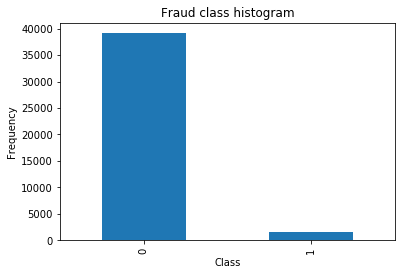

In [192]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
#目标变量分布不均衡

## 下采样

In [213]:
#特征
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# 标签
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# 提取索引
normal_indices = data[data.Class == 0].index

#抽样
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# 下采样
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# 抽样数据集
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 抽样结果
print("推荐失败用户占比: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("推荐成功用户占比: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("总数: ", len(under_sample_data))

推荐失败用户占比:  0.5
推荐成功用户占比:  0.5
总数:  3368


## 数据集拆分

In [215]:
from sklearn.cross_validation import train_test_split

# 全样数据
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("训练数据集(全样): ", len(X_train))
print("测试数据集(全样): ", len(X_test))
print("总计: ", len(X_train)+len(X_test))

# 下采样数据
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("采样训练数据集: ", len(X_train_undersample))
print("采样测试数据集: ", len(X_test_undersample))
print("总计: ", len(X_train_undersample)+len(X_test_undersample)) 

训练数据集(全样):  28547
测试数据集(全样):  12235
总计:  40782

采样训练数据集:  2357
采样测试数据集:  1011
总计:  3368


In [195]:
#召回率: Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [218]:
def printing_Kfold_scores(x_train_data,y_train_data):
    """K折交叉验证"""
    fold = KFold(len(y_train_data),5,shuffle=False) 

    #C参数
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C参数: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # 遍历每一个C参数,小样本, 采用L1惩罚项
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 预测结果
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            #召回率列表
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('迭代 ', iteration,': 召回率 ', recall_acc)

        # 平均召回率
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('最好的C参数', best_c)
    print('*********************************************************************************')
    
    return best_c

In [219]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample) #采样数据集训练模型

-------------------------------------------
C参数:  0.01
-------------------------------------------

迭代  1 : 召回率  0.857142857143
迭代  2 : 召回率  0.906666666667
迭代  3 : 召回率  0.823529411765
迭代  4 : 召回率  0.866379310345
迭代  5 : 召回率  0.90625

平均召回率  0.871993649184

-------------------------------------------
C参数:  0.1
-------------------------------------------

迭代  1 : 召回率  0.882352941176
迭代  2 : 召回率  0.902222222222
迭代  3 : 召回率  0.819327731092
迭代  4 : 召回率  0.862068965517
迭代  5 : 召回率  0.879464285714

平均召回率  0.869087229145

-------------------------------------------
C参数:  1
-------------------------------------------

迭代  1 : 召回率  0.886554621849
迭代  2 : 召回率  0.902222222222
迭代  3 : 召回率  0.810924369748
迭代  4 : 召回率  0.862068965517
迭代  5 : 召回率  0.883928571429

平均召回率  0.869139750153

-------------------------------------------
C参数:  10
-------------------------------------------

迭代  1 : 召回率  0.890756302521
迭代  2 : 召回率  0.897777777778
迭代  3 : 召回率  0.810924369748
迭代  4 : 召回率  0.85775862069
迭代  5 : 召回

In [227]:
def plot_confusion_matrix(cm, classes,
                          title='CM',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵图
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel('Predict label')

精度:  0.874762808349


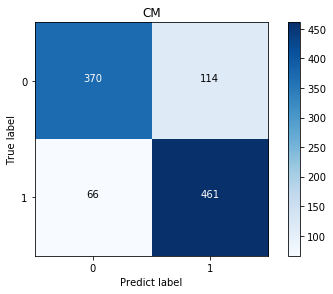

In [229]:
#采样数据集混淆矩阵
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("精度: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='CM')
plt.show()

精度:  0.870762711864


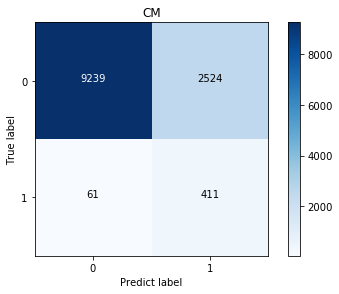

In [230]:
#全样数据集验证混淆矩阵
lr = LogisticRegression(C = best_c, penalty = 'l1') #选择L1惩罚项
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("精度: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='CM')
plt.show()

In [231]:
best_c = printing_Kfold_scores(X_train,y_train)#全样数据集训练出的模型

-------------------------------------------
C参数:  0.01
-------------------------------------------

迭代  1 : 召回率  0.00381679389313
迭代  2 : 召回率  0.0122950819672
迭代  3 : 召回率  0.0132158590308
迭代  4 : 召回率  0.0237154150198
迭代  5 : 召回率  0.00442477876106

平均召回率  0.0114935857344

-------------------------------------------
C参数:  0.1
-------------------------------------------

迭代  1 : 召回率  0.0916030534351
迭代  2 : 召回率  0.114754098361
迭代  3 : 召回率  0.127753303965
迭代  4 : 召回率  0.110671936759
迭代  5 : 召回率  0.0929203539823

平均召回率  0.1075405493

-------------------------------------------
C参数:  1
-------------------------------------------

迭代  1 : 召回率  0.118320610687
迭代  2 : 召回率  0.159836065574
迭代  3 : 召回率  0.149779735683
迭代  4 : 召回率  0.130434782609
迭代  5 : 召回率  0.12389380531

平均召回率  0.136452999972

-------------------------------------------
C参数:  10
-------------------------------------------

迭代  1 : 召回率  0.12213740458
迭代  2 : 召回率  0.159836065574
迭代  3 : 召回率  0.154185022026
迭代  4 : 召回率  0.134387351

精度:  0.14406779661


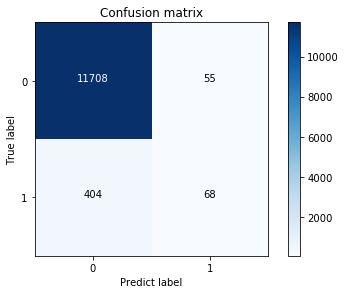

In [232]:
#全样数据集
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("精度: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()